In [1]:
import torchvision
from torchvision import transforms

import torch.optim as optim
from torch.utils.data import DataLoader

from score_models.models.unet import UNet
from score_models.trainer import trainer
from score_models.train_steps import TrainStepDenoisingScoreMatching
from score_models.utils.noise import get_sigmas


%load_ext autoreload
%autoreload 2

In [2]:
# Define transformations to be applied to the data
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),  # Convert PIL image or numpy array to tensor
])

# Download and load the MNIST training dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)


In [3]:
# Define parameters for the DataLoader
batch_size = 16
shuffle = True

# Create a DataLoader for the MNIST training dataset
images = [image for image, _ in train_dataset]
train_loader = DataLoader(dataset=images, batch_size=batch_size, shuffle=shuffle)

In [4]:
L=10
in_ch = 1
ch = 128
ch_mult = [1, 2, 2, 2]
attn = [2]
num_res_blocks = 2
dropout = 0.15


lr = 1e-4
sigma_min = 0.01
sigma_max = 1.0
device = "cuda"

# define score model
score_model = UNet(
    in_ch=in_ch, ch=ch, ch_mult=ch_mult, 
    L=L, attn=attn, num_res_blocks=num_res_blocks, dropout=dropout,
).to(device)

# define optimizer
optimizer = optim.Adam(score_model.parameters(), lr=lr)

# define train step (i.e., criterion)
sigmas = get_sigmas(L=L, sigma_min=sigma_min, sigma_max=sigma_max)
train_step = TrainStepDenoisingScoreMatching(score_model=score_model, sigmas=sigmas)


In [10]:
score_model = trainer(
    train_step=train_step,
    model=score_model,
    train_loader=train_loader,
    optimizer=optimizer,
    device=device,
    num_steps=10_000,
    log_every=100,
    save_every=5_000,
    checkpoint_dir="checkpoints/mnist/"
)

  0%|          | 0/10000 [00:00<?, ?it/s]

Step 0, Loss: 0.9994


  1%|          | 101/10000 [00:53<1:27:59,  1.88it/s]

Step 100, Loss: 1.0105


  2%|▏         | 201/10000 [01:46<1:27:56,  1.86it/s]

Step 200, Loss: 0.9951


  3%|▎         | 301/10000 [02:40<1:26:26,  1.87it/s]

Step 300, Loss: 0.9521


  4%|▍         | 401/10000 [03:34<1:25:59,  1.86it/s]

Step 400, Loss: 0.9992


  5%|▌         | 501/10000 [04:29<1:25:42,  1.85it/s]

Step 500, Loss: 1.0007


  6%|▌         | 601/10000 [05:23<1:24:52,  1.85it/s]

Step 600, Loss: 0.9996


  7%|▋         | 701/10000 [06:18<1:25:00,  1.82it/s]

Step 700, Loss: 0.9997


  8%|▊         | 801/10000 [07:13<1:23:55,  1.83it/s]

Step 800, Loss: 0.9982


  9%|▉         | 901/10000 [08:08<1:24:19,  1.80it/s]

Step 900, Loss: 0.9966


 10%|█         | 1001/10000 [09:03<1:22:09,  1.83it/s]

Step 1000, Loss: 0.9998


 11%|█         | 1101/10000 [09:58<1:22:26,  1.80it/s]

Step 1100, Loss: 1.0089


 12%|█▏        | 1201/10000 [10:52<1:20:04,  1.83it/s]

Step 1200, Loss: 1.0005


 13%|█▎        | 1301/10000 [11:47<1:19:45,  1.82it/s]

Step 1300, Loss: 1.0054


 14%|█▍        | 1401/10000 [12:42<1:18:39,  1.82it/s]

Step 1400, Loss: 1.0018


 15%|█▌        | 1501/10000 [13:37<1:17:32,  1.83it/s]

Step 1500, Loss: 1.0066


 16%|█▌        | 1601/10000 [14:31<1:16:28,  1.83it/s]

Step 1600, Loss: 0.9968


 17%|█▋        | 1701/10000 [15:26<1:14:32,  1.86it/s]

Step 1700, Loss: 0.9969


 18%|█▊        | 1801/10000 [16:21<1:17:47,  1.76it/s]

Step 1800, Loss: 0.9986


 19%|█▉        | 1901/10000 [17:15<1:14:11,  1.82it/s]

Step 1900, Loss: 0.9976


 20%|██        | 2001/10000 [18:10<1:13:06,  1.82it/s]

Step 2000, Loss: 0.8123


 21%|██        | 2101/10000 [19:05<1:11:23,  1.84it/s]

Step 2100, Loss: 0.1274


 22%|██▏       | 2201/10000 [19:59<1:10:26,  1.85it/s]

Step 2200, Loss: 0.1198


 23%|██▎       | 2301/10000 [20:54<1:10:22,  1.82it/s]

Step 2300, Loss: 0.0871


 24%|██▍       | 2401/10000 [21:49<1:08:25,  1.85it/s]

Step 2400, Loss: 0.0913


 25%|██▌       | 2501/10000 [22:44<1:07:27,  1.85it/s]

Step 2500, Loss: 0.0848


 26%|██▌       | 2601/10000 [23:38<1:07:03,  1.84it/s]

Step 2600, Loss: 0.0724


 27%|██▋       | 2701/10000 [24:33<1:06:44,  1.82it/s]

Step 2700, Loss: 0.0843


 28%|██▊       | 2801/10000 [25:28<1:05:21,  1.84it/s]

Step 2800, Loss: 0.0764


 29%|██▉       | 2901/10000 [26:22<1:03:57,  1.85it/s]

Step 2900, Loss: 0.0720


 30%|███       | 3001/10000 [27:17<1:04:58,  1.80it/s]

Step 3000, Loss: 0.0811


 31%|███       | 3101/10000 [28:12<1:03:10,  1.82it/s]

Step 3100, Loss: 0.0727


 32%|███▏      | 3201/10000 [29:06<1:05:50,  1.72it/s]

Step 3200, Loss: 0.0770


 33%|███▎      | 3301/10000 [30:01<1:00:34,  1.84it/s]

Step 3300, Loss: 0.0712


 34%|███▍      | 3401/10000 [30:56<1:00:23,  1.82it/s]

Step 3400, Loss: 0.0733


 35%|███▌      | 3501/10000 [31:50<58:19,  1.86it/s]  

Step 3500, Loss: 0.0744


 36%|███▌      | 3601/10000 [32:45<58:42,  1.82it/s]  

Step 3600, Loss: 0.0698


 37%|███▋      | 3701/10000 [33:40<56:40,  1.85it/s]  

Step 3700, Loss: 0.0667


 38%|███▊      | 3801/10000 [34:34<56:06,  1.84it/s]

Step 3800, Loss: 0.0668


 39%|███▉      | 3901/10000 [35:28<54:34,  1.86it/s]

Step 3900, Loss: 0.0649


 40%|████      | 4001/10000 [36:23<54:28,  1.84it/s]

Step 4000, Loss: 0.0726


 41%|████      | 4101/10000 [37:17<54:27,  1.81it/s]

Step 4100, Loss: 0.0722


 42%|████▏     | 4201/10000 [38:11<52:36,  1.84it/s]

Step 4200, Loss: 0.0655


 43%|████▎     | 4301/10000 [39:06<51:33,  1.84it/s]

Step 4300, Loss: 0.0648


 44%|████▍     | 4401/10000 [40:00<50:27,  1.85it/s]

Step 4400, Loss: 0.0695


 45%|████▌     | 4501/10000 [40:54<49:44,  1.84it/s]

Step 4500, Loss: 0.0705


 46%|████▌     | 4601/10000 [41:48<48:40,  1.85it/s]

Step 4600, Loss: 0.0647


 47%|████▋     | 4701/10000 [42:43<48:04,  1.84it/s]

Step 4700, Loss: 0.0646


 48%|████▊     | 4801/10000 [43:37<47:04,  1.84it/s]

Step 4800, Loss: 0.0644


 49%|████▉     | 4901/10000 [44:31<45:46,  1.86it/s]

Step 4900, Loss: 0.0606


 50%|█████     | 5000/10000 [45:25<44:42,  1.86it/s]

Step 5000, Loss: 0.0670


 51%|█████     | 5101/10000 [46:21<43:43,  1.87it/s]  

Step 5100, Loss: 0.0678


 52%|█████▏    | 5201/10000 [47:15<44:00,  1.82it/s]

Step 5200, Loss: 0.0668


 53%|█████▎    | 5301/10000 [48:10<42:56,  1.82it/s]

Step 5300, Loss: 0.0621


 54%|█████▍    | 5401/10000 [49:04<41:11,  1.86it/s]

Step 5400, Loss: 0.0664


 55%|█████▌    | 5501/10000 [49:59<40:35,  1.85it/s]

Step 5500, Loss: 0.0611


 56%|█████▌    | 5601/10000 [50:53<39:40,  1.85it/s]

Step 5600, Loss: 0.0665


 57%|█████▋    | 5701/10000 [51:48<38:34,  1.86it/s]

Step 5700, Loss: 0.0619


 58%|█████▊    | 5801/10000 [52:42<39:17,  1.78it/s]

Step 5800, Loss: 0.0725


 59%|█████▉    | 5901/10000 [53:36<37:44,  1.81it/s]

Step 5900, Loss: 0.0653


 60%|██████    | 6001/10000 [54:31<36:05,  1.85it/s]

Step 6000, Loss: 0.0653


 61%|██████    | 6101/10000 [55:25<35:24,  1.84it/s]

Step 6100, Loss: 0.0638


 62%|██████▏   | 6201/10000 [56:20<34:03,  1.86it/s]

Step 6200, Loss: 0.0671


 63%|██████▎   | 6301/10000 [57:14<33:26,  1.84it/s]

Step 6300, Loss: 0.0628


 64%|██████▍   | 6401/10000 [58:09<32:48,  1.83it/s]

Step 6400, Loss: 0.0683


 65%|██████▌   | 6501/10000 [59:03<31:45,  1.84it/s]

Step 6500, Loss: 0.0685


 66%|██████▌   | 6601/10000 [59:58<31:06,  1.82it/s]

Step 6600, Loss: 0.0607


 67%|██████▋   | 6701/10000 [1:00:52<30:00,  1.83it/s]

Step 6700, Loss: 1.0025


 68%|██████▊   | 6801/10000 [1:01:46<28:44,  1.86it/s]

Step 6800, Loss: 0.9133


 69%|██████▉   | 6901/10000 [1:02:41<28:22,  1.82it/s]

Step 6900, Loss: 0.7109


 70%|███████   | 7001/10000 [1:03:35<27:17,  1.83it/s]

Step 7000, Loss: 0.1315


 71%|███████   | 7101/10000 [1:04:29<26:10,  1.85it/s]

Step 7100, Loss: 0.0882


 72%|███████▏  | 7201/10000 [1:05:24<25:28,  1.83it/s]

Step 7200, Loss: 0.0697


 73%|███████▎  | 7301/10000 [1:06:18<24:25,  1.84it/s]

Step 7300, Loss: 0.0632


 74%|███████▍  | 7401/10000 [1:07:13<23:35,  1.84it/s]

Step 7400, Loss: 0.0674


 75%|███████▌  | 7501/10000 [1:08:07<22:30,  1.85it/s]

Step 7500, Loss: 0.0676


 76%|███████▌  | 7601/10000 [1:09:02<21:45,  1.84it/s]

Step 7600, Loss: 0.0639


 77%|███████▋  | 7701/10000 [1:09:56<20:36,  1.86it/s]

Step 7700, Loss: 0.0784


 78%|███████▊  | 7801/10000 [1:10:50<19:57,  1.84it/s]

Step 7800, Loss: 0.0692


 79%|███████▉  | 7901/10000 [1:11:45<18:57,  1.85it/s]

Step 7900, Loss: 0.0673


 80%|████████  | 8001/10000 [1:12:39<17:56,  1.86it/s]

Step 8000, Loss: 0.0599


 81%|████████  | 8101/10000 [1:13:33<17:20,  1.83it/s]

Step 8100, Loss: 0.0618


 82%|████████▏ | 8201/10000 [1:14:28<16:21,  1.83it/s]

Step 8200, Loss: 0.0671


 83%|████████▎ | 8301/10000 [1:15:22<15:31,  1.82it/s]

Step 8300, Loss: 0.0677


 84%|████████▍ | 8401/10000 [1:16:16<14:24,  1.85it/s]

Step 8400, Loss: 0.0667


 85%|████████▌ | 8501/10000 [1:17:11<13:39,  1.83it/s]

Step 8500, Loss: 0.0674


 86%|████████▌ | 8601/10000 [1:18:05<12:35,  1.85it/s]

Step 8600, Loss: 0.0650


 87%|████████▋ | 8701/10000 [1:18:59<11:45,  1.84it/s]

Step 8700, Loss: 0.0633


 88%|████████▊ | 8801/10000 [1:19:54<10:47,  1.85it/s]

Step 8800, Loss: 0.0664


 89%|████████▉ | 8901/10000 [1:20:48<09:58,  1.84it/s]

Step 8900, Loss: 0.0678


 90%|█████████ | 9001/10000 [1:21:42<08:58,  1.85it/s]

Step 9000, Loss: 0.0640


 91%|█████████ | 9101/10000 [1:22:36<08:04,  1.86it/s]

Step 9100, Loss: 0.0662


 92%|█████████▏| 9201/10000 [1:23:31<07:08,  1.86it/s]

Step 9200, Loss: 0.0673


 93%|█████████▎| 9301/10000 [1:24:25<06:20,  1.84it/s]

Step 9300, Loss: 0.0720


 94%|█████████▍| 9401/10000 [1:25:19<05:25,  1.84it/s]

Step 9400, Loss: 0.0552


 95%|█████████▌| 9501/10000 [1:26:14<04:29,  1.85it/s]

Step 9500, Loss: 0.0663


 96%|█████████▌| 9601/10000 [1:27:08<03:37,  1.83it/s]

Step 9600, Loss: 0.0628


 97%|█████████▋| 9701/10000 [1:28:02<02:42,  1.84it/s]

Step 9700, Loss: 0.0630


 98%|█████████▊| 9801/10000 [1:28:57<01:48,  1.84it/s]

Step 9800, Loss: 0.0660


 99%|█████████▉| 9901/10000 [1:29:51<00:54,  1.81it/s]

Step 9900, Loss: 0.0667


100%|██████████| 10000/10000 [1:30:45<00:00,  1.84it/s]


In [20]:
import torch
from score_models.sampling import annealed_langevin_dynamics

samples = annealed_langevin_dynamics(
    score_model=score_model, 
    input_size=(64, 1, 32, 32), 
    sigmas=sigmas,
    T=100,
    eps=5e-4,
    r=[0, 1]
).cpu()

samples = torch.clamp(samples, 0, 1)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]

    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])


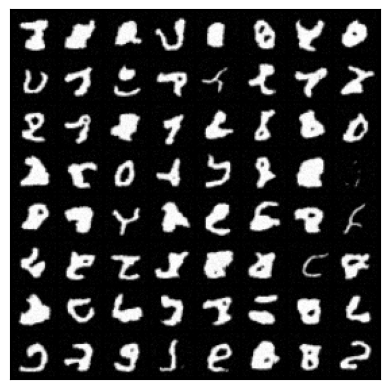

In [22]:
grid = torchvision.utils.make_grid(samples, nrow=8, normalize=True, value_range=(0, 1))
show(grid)